In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.express as px

# Load the Data

In [21]:
pwd

'D:\\Credit-Risk-Project\\credit-risk-modelling\\notebooks'

In [22]:
# read the data

data_path = 'F:/My Drive/credit risk project/data/data.csv'

final_df = pd.read_csv(data_path)

final_df.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


# Initial Analysis

In [23]:
# get the info of the data

final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 87 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   Total_TL                      51336 non-null  int64  
 2   Tot_Closed_TL                 51336 non-null  int64  
 3   Tot_Active_TL                 51336 non-null  int64  
 4   Total_TL_opened_L6M           51336 non-null  int64  
 5   Tot_TL_closed_L6M             51336 non-null  int64  
 6   pct_tl_open_L6M               51336 non-null  float64
 7   pct_tl_closed_L6M             51336 non-null  float64
 8   pct_active_tl                 51336 non-null  float64
 9   pct_closed_tl                 51336 non-null  float64
 10  Total_TL_opened_L12M          51336 non-null  int64  
 11  Tot_TL_closed_L12M            51336 non-null  int64  
 12  pct_tl_open_L12M              51336 non-null  float64
 13  p

**Overview**:
1. No null values in the data.
2. There are 6 categorical/text columns in the data.
   - Marital_Status
   - Education
   - Gender
   - Last_Product_Enq
   - First_Product_Enq
   - Approved Flag (Target)
4. Rest are all numerical columns.

In [24]:
# get the statistical summary of all the numerical columns

(
    final_df
    .select_dtypes(include='number')
    .drop(columns=final_df.columns[0])
    .describe()
    .to_csv('Data-statistical-Summary.csv')
)


In [25]:
# columns having missing values

(
    final_df
    .isna()
    .sum()
    .loc[lambda ser: ser.gt(0)]
)

Series([], dtype: int64)

In [26]:
# columns having negative values

(
    final_df
    .select_dtypes('number')
    .min()
    .loc[lambda ser: ser < 0]
)

Age_Oldest_TL                  -99999.0
Age_Newest_TL                  -99999.0
time_since_recent_payment      -99999.0
time_since_first_deliquency    -99999.0
time_since_recent_deliquency   -99999.0
max_delinquency_level          -99999.0
max_deliq_6mts                 -99999.0
max_deliq_12mts                -99999.0
tot_enq                        -99999.0
CC_enq                         -99999.0
CC_enq_L6m                     -99999.0
CC_enq_L12m                    -99999.0
PL_enq                         -99999.0
PL_enq_L6m                     -99999.0
PL_enq_L12m                    -99999.0
time_since_recent_enq          -99999.0
enq_L12m                       -99999.0
enq_L6m                        -99999.0
enq_L3m                        -99999.0
pct_currentBal_all_TL          -99999.0
CC_utilization                 -99999.0
PL_utilization                 -99999.0
max_unsec_exposure_inPct       -99999.0
dtype: float64

**The domain expert said that the missing or no info values in the data we replaced by `-99999`**

In [27]:
# get the missing value

missing_value = (
     final_df
    .select_dtypes('number')
    .min()
    .loc[lambda ser: ser < 0]
    .min()
)

missing_value

np.float64(-99999.0)

In [28]:
# missing value in the data after -99999 is replaced with nan

(
    final_df
    .replace(missing_value,np.nan)
    .isna()
    .mean()
    .loc[lambda ser: ser > 0]
    .mul(100)
    .sort_values(ascending=False)
)

CC_utilization                  92.792582
PL_utilization                  86.557192
time_since_first_deliquency     70.026882
time_since_recent_deliquency    70.026882
max_delinquency_level           70.026882
max_unsec_exposure_inPct        45.149603
max_deliq_6mts                  25.109085
max_deliq_12mts                 21.100203
PL_enq_L12m                     12.312997
enq_L3m                         12.312997
enq_L6m                         12.312997
enq_L12m                        12.312997
time_since_recent_enq           12.312997
CC_enq_L12m                     12.312997
PL_enq_L6m                      12.312997
PL_enq                          12.312997
CC_enq_L6m                      12.312997
CC_enq                          12.312997
tot_enq                         12.312997
time_since_recent_payment        8.358657
pct_currentBal_all_TL            0.140252
Age_Newest_TL                    0.077918
Age_Oldest_TL                    0.077918
dtype: float64

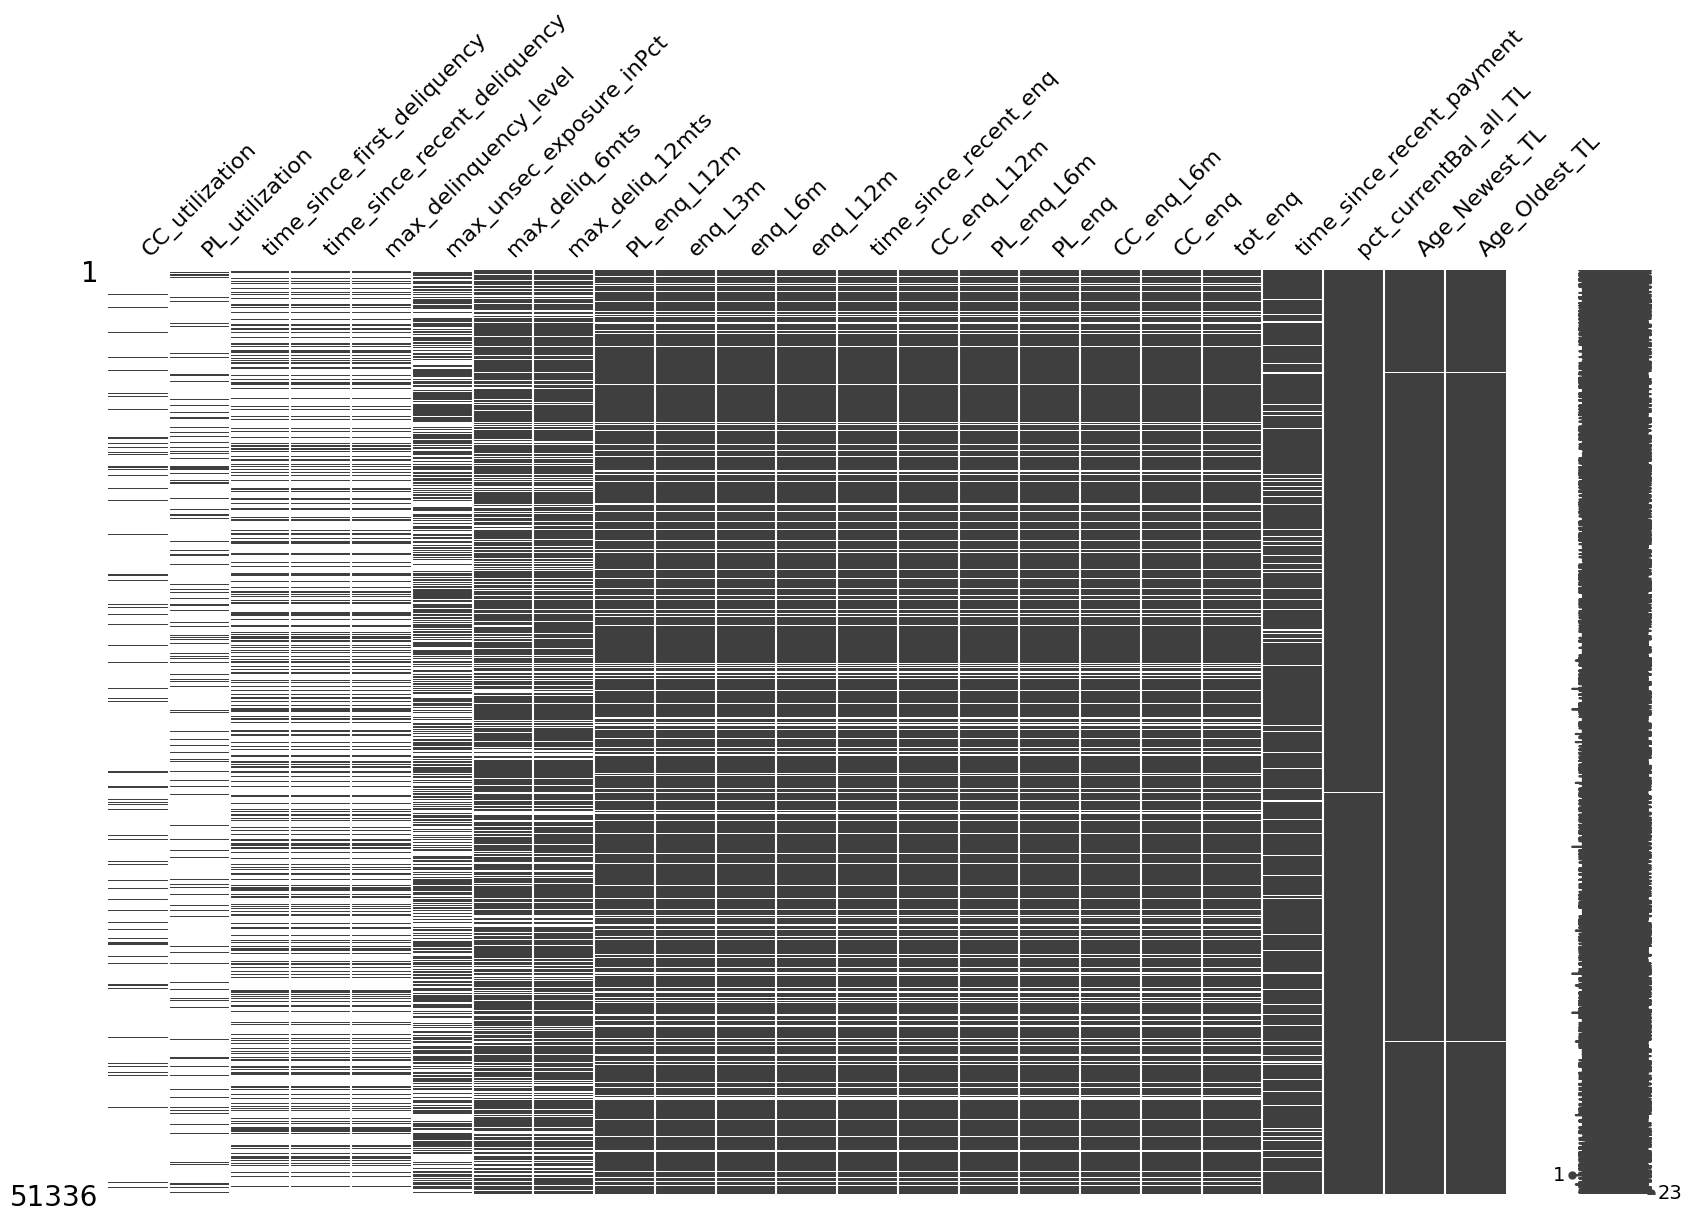

In [29]:
# plot the heatmap for the missing values

columns_having_missing_values = (
    final_df
    .replace(missing_value,np.nan)
    .isna()
    .mean()
    .loc[lambda ser: ser > 0]
    .mul(100)
    .sort_values(ascending=False)
    .index
    .tolist()
)

missingno.matrix(df=final_df.loc[:,columns_having_missing_values].replace(missing_value,np.nan),
                 figsize=(20,12));


plt.savefig('missingness.png')

In [30]:
# no. of columns having missing data


len(columns_having_missing_values)

23

In [31]:
# capture the missingness information and then remove the columns

def capture_missingness(df,column_names):
    return (
        df.assign(**{
            col : np.where(df.loc[:,col] == np.nan, 1 ,0)
            for col in column_names
        })
        .drop(columns=column_names)
    )


column_names = (
    final_df
    .replace(missing_value,np.nan)
    .isna()
    .mean()
    .mul(100)
    .loc[lambda ser : ser >= 50]
    .index
    .tolist()
)

In [32]:
final_df.isnull().mean().gt(0.5)

PROSPECTID             False
Total_TL               False
Tot_Closed_TL          False
Tot_Active_TL          False
Total_TL_opened_L6M    False
                       ...  
GL_Flag                False
last_prod_enq2         False
first_prod_enq2        False
Credit_Score           False
Approved_Flag          False
Length: 87, dtype: bool

In [33]:
# check the rows where the data is missing more than 50% out of all columns having missing data

(
    final_df
    .loc[:,columns_having_missing_values]
    .replace(missing_value,np.nan)
    .isna()
    .mean(axis=1)
    .mul(100)
    .loc[lambda ser : ser >= 50]
    .count()
)

np.int64(6321)

## Data Cleaning

In [34]:
def show_nan(df):
    return (
        df
        .rename(columns=str.lower)
        .replace(missing_value,np.nan)
    )

In [35]:
final_df = show_nan(final_df)

final_df

,prospectid,total_tl,tot_closed_tl,tot_active_tl,total_tl_opened_l6m,tot_tl_closed_l6m,pct_tl_open_l6m,pct_tl_closed_l6m,pct_active_tl,pct_closed_tl,...,pct_cc_enq_l6m_of_l12m,pct_pl_enq_l6m_of_ever,pct_cc_enq_l6m_of_ever,max_unsec_exposure_inpct,hl_flag,gl_flag,last_prod_enq2,first_prod_enq2,credit_score,approved_flag
0,1,5,4,1,0,0,0.000,0.00,0.200,0.800,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.00,1.000,0.000,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.00,1.000,0.000,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,1,0,1,1,0,1.000,0.00,1.000,0.000,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,3,2,1,0,0,0.000,0.00,0.333,0.667,...,0.0,0.0,0.0,NaN,0,0,AL,AL,753,P1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,3,0,3,1,0,0.333,0.00,1.000,0.000,...,0.0,0.0,0.0,1.661,0,0,ConsumerLoan,ConsumerLoan,650,P4
51332,51333,4,2,2,0,1,0.000,0.25,0.500,0.500,...,0.0,0.0,0.0,0.520,0,0,others,others,702,P1
51333,51334,2,1,1,1,1,0.500,0.50,0.500,0.500,...,0.0,1.0,0.0,0.567,0,0,ConsumerLoan,others,661,P3
51334,51335,2,1,1,0,0,0.000,0.00,0.500,0.500,...,0.0,0.0,0.0,1.202,0,0,ConsumerLoan,others,686,P2


<Axes: >

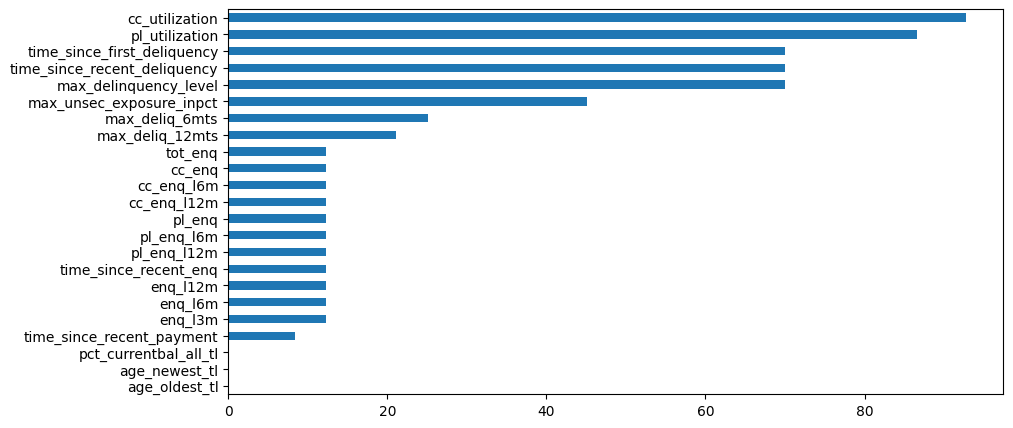

In [36]:
# check for missing values percentage in features

(
    final_df
    .isna()
    .mean()
    .mul(100)
    .loc[lambda ser: ser > 0]
    # .count()
    .sort_values(ascending=True)
    .plot(kind='barh',figsize=(10,5))
)

In [37]:
# calculate the min, max, median and mean of the columns that have missing values

(
    final_df
    .select_dtypes(include='number')
    .loc[:,lambda df: df.isna().any()]
    .agg(["min","max","median","mean"])
    .transpose()
)

,min,max,median,mean
age_oldest_tl,0.0,392.000,33.0000,45.376969
age_newest_tl,0.0,392.000,8.0000,15.780022
time_since_recent_payment,2.0,6065.000,74.0000,249.463599
time_since_first_deliquency,0.0,35.000,21.0000,20.318646
time_since_recent_deliquency,0.0,35.000,10.0000,12.696757
max_delinquency_level,1.0,900.000,33.0000,74.047573
max_deliq_6mts,0.0,900.000,0.0000,4.841128
max_deliq_12mts,0.0,900.000,0.0000,9.206498
tot_enq,1.0,176.000,3.0000,5.291036
cc_enq,0.0,42.000,0.0000,0.467266


In [38]:
# once again check the columns in the data

final_df.columns

Index(['prospectid', 'total_tl', 'tot_closed_tl', 'tot_active_tl',
       'total_tl_opened_l6m', 'tot_tl_closed_l6m', 'pct_tl_open_l6m',
       'pct_tl_closed_l6m', 'pct_active_tl', 'pct_closed_tl',
       'total_tl_opened_l12m', 'tot_tl_closed_l12m', 'pct_tl_open_l12m',
       'pct_tl_closed_l12m', 'tot_missed_pmnt', 'auto_tl', 'cc_tl',
       'consumer_tl', 'gold_tl', 'home_tl', 'pl_tl', 'secured_tl',
       'unsecured_tl', 'other_tl', 'age_oldest_tl', 'age_newest_tl',
       'time_since_recent_payment', 'time_since_first_deliquency',
       'time_since_recent_deliquency', 'num_times_delinquent',
       'max_delinquency_level', 'max_recent_level_of_deliq', 'num_deliq_6mts',
       'num_deliq_12mts', 'num_deliq_6_12mts', 'max_deliq_6mts',
       'max_deliq_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std',
       'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts',
       'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss',
       'num_lss_6mts', 'n

# Column Wise EDA

### TL columns

In [49]:
tl_subset = final_df[final_df.columns[1:14]]

tl_subset

,total_tl,tot_closed_tl,tot_active_tl,total_tl_opened_l6m,tot_tl_closed_l6m,pct_tl_open_l6m,pct_tl_closed_l6m,pct_active_tl,pct_closed_tl,total_tl_opened_l12m,tot_tl_closed_l12m,pct_tl_open_l12m,pct_tl_closed_l12m
0,5,4,1,0,0,0.000,0.00,0.200,0.800,0,0,0.000,0.00
1,1,0,1,0,0,0.000,0.00,1.000,0.000,1,0,1.000,0.00
2,8,0,8,1,0,0.125,0.00,1.000,0.000,2,0,0.250,0.00
3,1,0,1,1,0,1.000,0.00,1.000,0.000,1,0,1.000,0.00
4,3,2,1,0,0,0.000,0.00,0.333,0.667,0,0,0.000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,3,0,3,1,0,0.333,0.00,1.000,0.000,1,0,0.333,0.00
51332,4,2,2,0,1,0.000,0.25,0.500,0.500,2,1,0.500,0.25
51333,2,1,1,1,1,0.500,0.50,0.500,0.500,2,1,1.000,0.50
51334,2,1,1,0,0,0.000,0.00,0.500,0.500,1,1,0.500,0.50


In [50]:
# statistical summary of total tl

final_df['total_tl'].describe()

count    51336.000000
mean         4.858598
std          7.177116
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        235.000000
Name: total_tl, dtype: float64

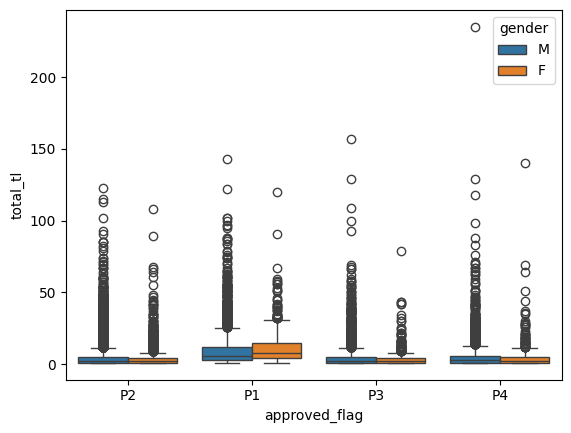

In [57]:
# boxplot of total tl

sns.boxplot(final_df,x='approved_flag',y='total_tl',hue='gender');

**Observations**
- Males generally in each category have more total trade lines as compared to Females.
- The high risk category which is `P4` also has more total TL for males as compared to females. 

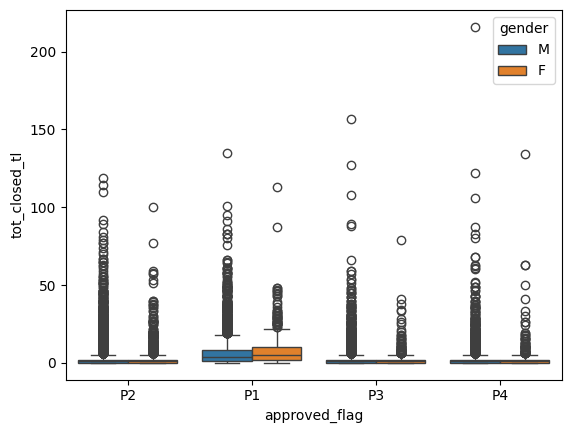

In [58]:
# boxplot of closed tl

sns.boxplot(final_df,x='approved_flag',y='tot_closed_tl',hue='gender');

**Very similar in distribution as compared to total TL**

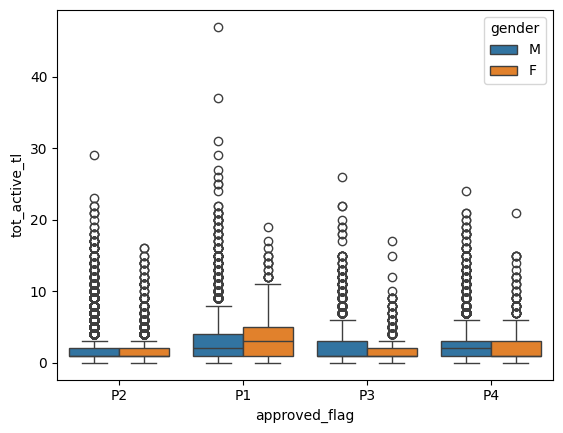

In [59]:
# boxplot of total active tl

sns.boxplot(final_df,x='approved_flag',y='tot_active_tl',hue='gender');

In [67]:
tl_cols_to_remove = tl_subset.filter(regex='^(?!.*pct).*').columns.tolist()
tl_cols_to_remove

['total_tl',
 'tot_closed_tl',
 'tot_active_tl',
 'total_tl_opened_l6m',
 'tot_tl_closed_l6m',
 'total_tl_opened_l12m',
 'tot_tl_closed_l12m']

### Total missed payments

In [71]:
final_df['tot_missed_pmnt'].agg(['min','max','median','mean'])

min        0.000000
max       34.000000
median     0.000000
mean       0.546751
Name: tot_missed_pmnt, dtype: float64

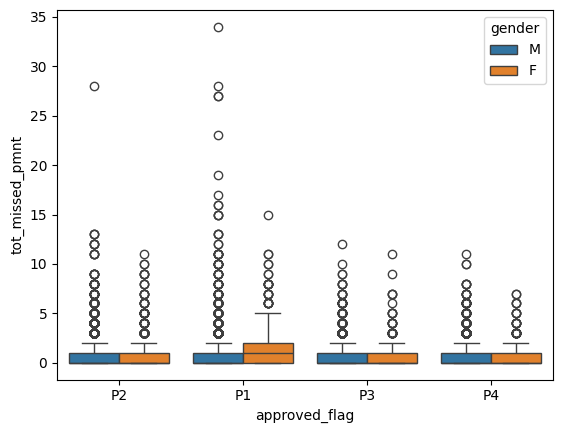

In [72]:
# boxplot of total missed payments

sns.boxplot(final_df,x='approved_flag',y='tot_missed_pmnt',hue='gender');

### TL types

In [74]:
tl_types_columns = ['auto_tl', 'cc_tl',
                   'consumer_tl', 'gold_tl', 
                   'home_tl', 'pl_tl', 'secured_tl',
                   'unsecured_tl', 'other_tl']

tl_types_columns

['auto_tl',
 'cc_tl',
 'consumer_tl',
 'gold_tl',
 'home_tl',
 'pl_tl',
 'secured_tl',
 'unsecured_tl',
 'other_tl']

In [76]:
types_tl_subset = final_df[tl_types_columns]
types_tl_subset

,auto_tl,cc_tl,consumer_tl,gold_tl,home_tl,pl_tl,secured_tl,unsecured_tl,other_tl
0,0,0,0,1,0,4,1,4,0
1,0,0,1,0,0,0,0,1,0
2,1,0,6,1,0,0,2,6,0
3,0,0,0,0,0,0,0,1,1
4,1,0,0,0,0,0,3,0,2
...,...,...,...,...,...,...,...,...,...
51331,0,0,2,0,0,0,0,3,1
51332,2,0,2,0,0,0,2,2,0
51333,0,0,2,0,0,0,0,2,0
51334,0,0,2,0,0,0,0,2,0


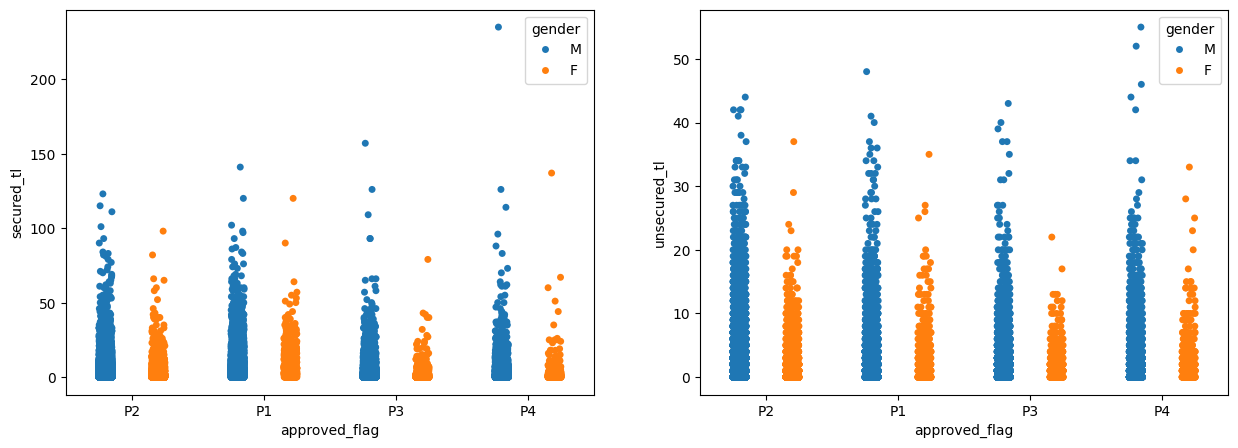

In [84]:
fig = plt.figure(figsize=(15,5))
columns = ["secured_tl", "unsecured_tl"]
for i in range(2):
    plt.subplot(1,2,i+1)
    sns.stripplot(data=final_df,x='approved_flag',
                  y=columns[i],hue='gender',
                  dodge=True)    

**Observations**
- Customers are given more secured TLs as compared to unsecured TLs.
- The Less risky customers are keen in secured TL's more.
- Risky customers avoid taking secured TLs.
- Risky Customers have a higher preference of taking more unsecured TLs.

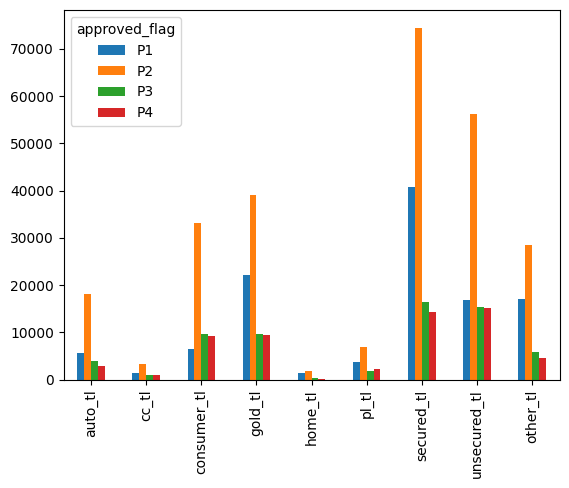

In [98]:
approved_flag_grp = final_df.groupby('approved_flag')

approved_flag_grp[types_tl_subset.columns].sum().T.plot(kind='bar');

### Age and Time Columns

In [100]:
age_columns = ['age_oldest_tl', 'age_newest_tl', 'time_since_recent_payment',
               'time_since_first_deliquency', 'time_since_recent_deliquency',
               'num_times_delinquent']

age_columns

['age_oldest_tl',
 'age_newest_tl',
 'time_since_recent_payment',
 'time_since_first_deliquency',
 'time_since_recent_deliquency',
 'num_times_delinquent']

In [101]:
age_subset = final_df[age_columns]

age_subset

,age_oldest_tl,age_newest_tl,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent
0,72.0,18.0,549.0,35.0,15.0,11
1,7.0,7.0,47.0,NaN,NaN,0
2,47.0,2.0,302.0,11.0,3.0,9
3,5.0,5.0,NaN,NaN,NaN,0
4,131.0,32.0,583.0,NaN,NaN,0
...,...,...,...,...,...,...
51331,24.0,5.0,15.0,24.0,23.0,2
51332,74.0,7.0,57.0,NaN,NaN,0
51333,9.0,5.0,32.0,NaN,NaN,0
51334,15.0,8.0,58.0,NaN,NaN,0


In [103]:
# check for missing values in age subset

age_subset.isna().mean()

age_oldest_tl                   0.000779
age_newest_tl                   0.000779
time_since_recent_payment       0.083587
time_since_first_deliquency     0.700269
time_since_recent_deliquency    0.700269
num_times_delinquent            0.000000
dtype: float64

In [106]:
age_subset[['age_oldest_tl','age_newest_tl']].describe()

,age_oldest_tl,age_newest_tl
count,51296.000000,51296.000000
mean,45.376969,15.780022
std,41.737151,21.995676
min,0.000000,0.000000
25%,14.000000,4.000000
50%,33.000000,8.000000
75%,64.000000,17.000000
max,392.000000,392.000000


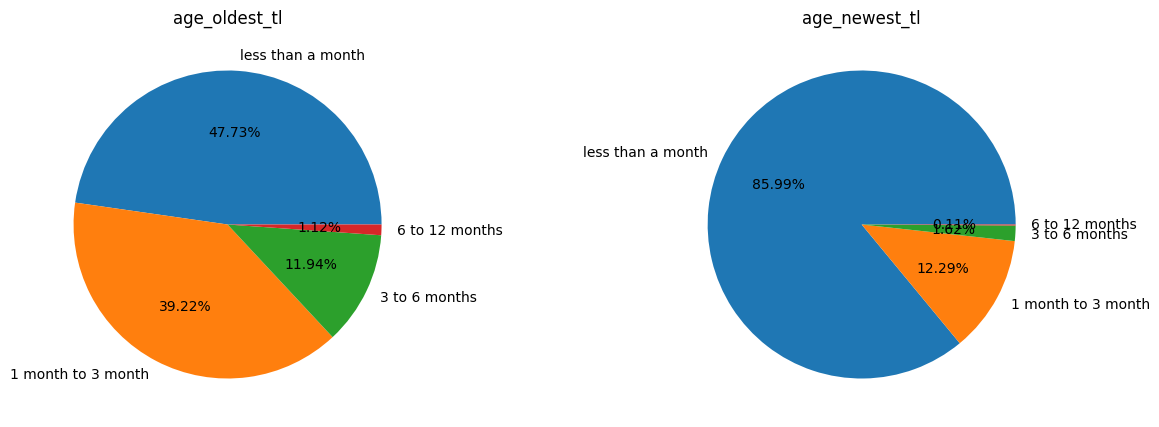

In [125]:
# create bins and labels

def plot_pie_charts(df):
    bins = [0,30,90,180,392]
    labels= ['less than a month',
             '1 month to 3 month',
             '3 to 6 months',
             '6 to 12 months']
    
    cols = df.columns.tolist()
    fig = plt.figure(figsize=(15,5))
    for i, col in enumerate(cols):
        plt.subplot(1,2,i+1)
        plt.pie(pd.cut(df[col],bins=bins,labels=labels).value_counts(),
                labels=pd.cut(df[col],bins=bins,labels=labels).value_counts().index,autopct="%.2f%%")
        plt.title(col)

plot_pie_charts(age_subset[['age_oldest_tl','age_newest_tl']])

# Data Cleaning

In [68]:
def clean_data(df):
    return(
        df
        .drop(columns=['prospectid'])
        .drop(columns=tl_cols_to_remove)
        
    )

In [69]:
clean_df = clean_data(final_df)

clean_df

,pct_tl_open_l6m,pct_tl_closed_l6m,pct_active_tl,pct_closed_tl,pct_tl_open_l12m,pct_tl_closed_l12m,tot_missed_pmnt,auto_tl,cc_tl,consumer_tl,...,pct_cc_enq_l6m_of_l12m,pct_pl_enq_l6m_of_ever,pct_cc_enq_l6m_of_ever,max_unsec_exposure_inpct,hl_flag,gl_flag,last_prod_enq2,first_prod_enq2,credit_score,approved_flag
0,0.000,0.00,0.200,0.800,0.000,0.00,0,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,0.000,0.00,1.000,0.000,1.000,0.00,0,0,0,1,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,0.125,0.00,1.000,0.000,0.250,0.00,1,1,0,6,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,1.000,0.00,1.000,0.000,1.000,0.00,1,0,0,0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,0.000,0.00,0.333,0.667,0.000,0.00,0,1,0,0,...,0.0,0.0,0.0,NaN,0,0,AL,AL,753,P1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,0.333,0.00,1.000,0.000,0.333,0.00,0,0,0,2,...,0.0,0.0,0.0,1.661,0,0,ConsumerLoan,ConsumerLoan,650,P4
51332,0.000,0.25,0.500,0.500,0.500,0.25,0,2,0,2,...,0.0,0.0,0.0,0.520,0,0,others,others,702,P1
51333,0.500,0.50,0.500,0.500,1.000,0.50,0,0,0,2,...,0.0,1.0,0.0,0.567,0,0,ConsumerLoan,others,661,P3
51334,0.000,0.00,0.500,0.500,0.500,0.50,0,0,0,2,...,0.0,0.0,0.0,1.202,0,0,ConsumerLoan,others,686,P2


In [70]:
clean_df.columns

Index(['pct_tl_open_l6m', 'pct_tl_closed_l6m', 'pct_active_tl',
       'pct_closed_tl', 'pct_tl_open_l12m', 'pct_tl_closed_l12m',
       'tot_missed_pmnt', 'auto_tl', 'cc_tl', 'consumer_tl', 'gold_tl',
       'home_tl', 'pl_tl', 'secured_tl', 'unsecured_tl', 'other_tl',
       'age_oldest_tl', 'age_newest_tl', 'time_since_recent_payment',
       'time_since_first_deliquency', 'time_since_recent_deliquency',
       'num_times_delinquent', 'max_delinquency_level',
       'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts',
       'num_deliq_6_12mts', 'max_deliq_6mts', 'max_deliq_12mts',
       'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std', 'num_std_6mts',
       'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt',
       'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts',
       'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq', 'cc_enq',
       'cc_enq_l6m', 'cc_enq_l12m', 'pl_enq', 'pl_enq_l6m', 'pl_enq_l12m',
       'time_since_recent_en